<a href="https://colab.research.google.com/github/moizbut/Machine-Learning-Tutorial/blob/main/Kernal_comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 58s 60ms/step - accuracy: 0.9008 - loss: 0.3383 - val_accuracy: 0.9848 - val_loss: 0.0490
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 80s 58ms/step - accuracy: 0.9851 - loss: 0.0462 - val_accuracy: 0.9889 - val_loss: 0.0341
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 54s 58ms/step - accuracy: 0.9897 - loss: 0.0323 - val_accuracy: 0.9892 - val_loss: 0.0308
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 81s 57ms/step - accuracy: 0.9936 - loss: 0.0221 - val_accuracy: 0.9863 - val_loss: 0.0439
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 83s 58ms/step - accuracy: 0.9944 - loss: 0.0183 - val_accuracy: 0.9914 - val_loss: 0.0266
Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 69s 72ms/step - accuracy: 0.9005 - loss: 0.3352 - val_accuracy: 0.9861 - val_loss: 0.0466
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 81s 71ms/step - accuracy: 0.9863 - loss: 0.0433 - val_accuracy: 0.9895 - val_loss: 0.0327
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 67s 71ms/step - accuracy: 0.9905 - loss: 0.0301 - val_accu

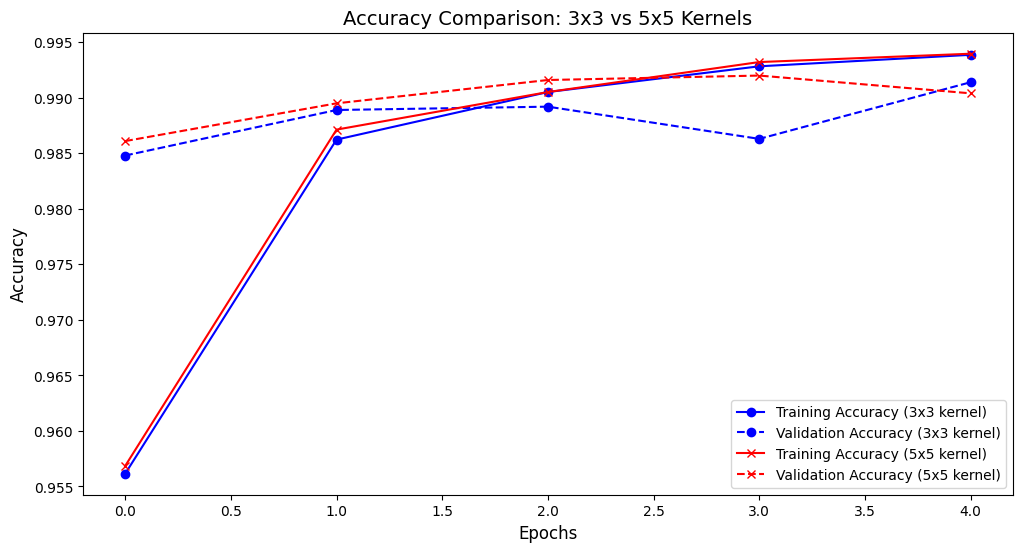

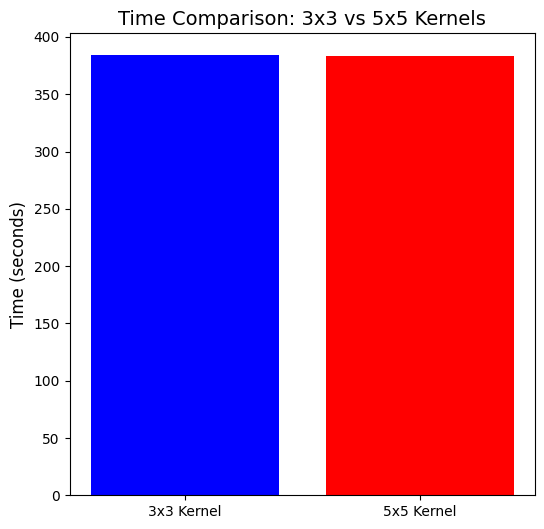

Time taken for training with 3x3 kernel: 383.98 seconds
Time taken for training with 5x5 kernel: 383.17 seconds


In [10]:
# Comparison of time vs accuracy

import tensorflow as tf
import time
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess the data
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

# Function to build the model with a given kernel size
def build_model(kernel_size):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Conv2D(32, kernel_size, activation='relu', input_shape=(28, 28, 1)))
    model.add(tf.keras.layers.MaxPooling2D((2, 2)))
    model.add(tf.keras.layers.Conv2D(64, kernel_size, activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D((2, 2)))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(128, activation='relu'))
    model.add(tf.keras.layers.Dense(10, activation='softmax'))
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Train model with 3x3 kernel
kernel_3x3 = (3, 3)
model_3x3 = build_model(kernel_3x3)
start_time_3x3 = time.time()
history_3x3 = model_3x3.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test))
end_time_3x3 = time.time()
time_taken_3x3 = end_time_3x3 - start_time_3x3

# Train model with 5x5 kernel
kernel_5x5 = (5, 5)
model_5x5 = build_model(kernel_5x5)
start_time_5x5 = time.time()
history_5x5 = model_5x5.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test))
end_time_5x5 = time.time()
time_taken_5x5 = end_time_5x5 - start_time_5x5

# Plot accuracy comparison
plt.figure(figsize=(12, 6))

# Training and validation accuracy for 3x3 kernel
plt.plot(history_3x3.history['accuracy'], label='Training Accuracy (3x3 kernel)', color='b', linestyle='-', marker='o')
plt.plot(history_3x3.history['val_accuracy'], label='Validation Accuracy (3x3 kernel)', color='b', linestyle='--', marker='o')

# Training and validation accuracy for 5x5 kernel
plt.plot(history_5x5.history['accuracy'], label='Training Accuracy (5x5 kernel)', color='r', linestyle='-', marker='x')
plt.plot(history_5x5.history['val_accuracy'], label='Validation Accuracy (5x5 kernel)', color='r', linestyle='--', marker='x')

# Add labels and title
plt.title('Accuracy Comparison: 3x3 vs 5x5 Kernels', fontsize=14)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend()

# Show the accuracy plot
plt.show()

# Plot time comparison
plt.figure(figsize=(6, 6))

# Plotting time taken for training both models
kernels = ['3x3 Kernel', '5x5 Kernel']
time_taken = [time_taken_3x3, time_taken_5x5]

plt.bar(kernels, time_taken, color=['b', 'r'])
plt.title('Time Comparison: 3x3 vs 5x5 Kernels', fontsize=14)
plt.ylabel('Time (seconds)', fontsize=12)

# Show the time plot
plt.show()

# Print the time taken for both models
print(f"Time taken for training with 3x3 kernel: {time_taken_3x3:.2f} seconds")
print(f"Time taken for training with 5x5 kernel: {time_taken_5x5:.2f} seconds")


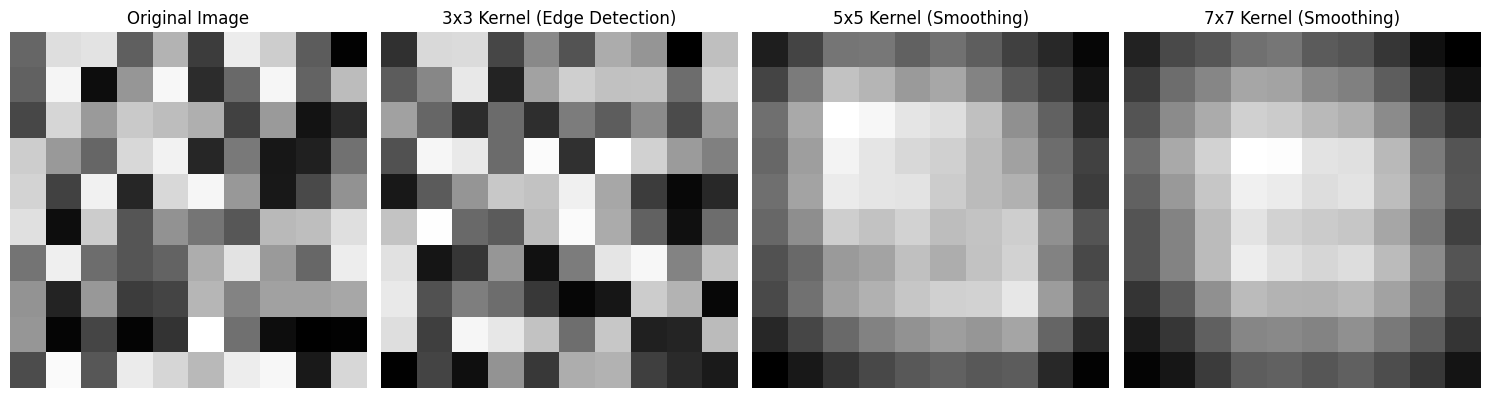

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a random grayscale image (10x10 for simplicity)
np.random.seed(42)  # For reproducibility
random_image = np.random.randint(0, 256, size=(10, 10), dtype=np.uint8)

# Define kernels
kernel_3x3 = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])  # Edge detection
kernel_5x5 = np.ones((5, 5)) / 25  # Smoothing
kernel_7x7 = np.ones((7, 7)) / 49  # Smoothing

# Convolution function
def convolve(image, kernel):
    kernel_size = kernel.shape[0]
    pad = kernel_size // 2  # Padding size based on kernel
    padded_image = np.pad(image, pad_width=pad, mode='constant', constant_values=0)
    output = np.zeros_like(image)

    for i in range(image.shape[0]):  # Iterate over image rows
        for j in range(image.shape[1]):  # Iterate over image columns
            region = padded_image[i:i + kernel_size, j:j + kernel_size]
            output[i, j] = np.sum(region * kernel)

    return output

# Apply convolution with each kernel
output_3x3 = convolve(random_image, kernel_3x3)
output_5x5 = convolve(random_image, kernel_5x5)
output_7x7 = convolve(random_image, kernel_7x7)

# Plot the results
fig, axes = plt.subplots(1, 4, figsize=(15, 5))
axes[0].imshow(random_image, cmap='gray')
axes[0].set_title("Original Image")
axes[0].axis('off')

axes[1].imshow(output_3x3, cmap='gray')
axes[1].set_title("3x3 Kernel (Edge Detection)")
axes[1].axis('off')

axes[2].imshow(output_5x5, cmap='gray')
axes[2].set_title("5x5 Kernel (Smoothing)")
axes[2].axis('off')

axes[3].imshow(output_7x7, cmap='gray')
axes[3].set_title("7x7 Kernel (Smoothing)")
axes[3].axis('off')

plt.tight_layout()
plt.show()
